# **<span style="color:deepskyblue">Asteroid Logic and Vectors</span>**

<img src="../../db_assets/vegeta_meteors.gif" style="height: 300px"/>

+ ähnliches Verhalten wie der Laser
+ bewegen sich stattdessen aber nach Unten\
  und werden zufällig über dem oberen Bildschirmrand gespawned

***

In [ ]:
asteroid_timer = pygame.event.custom_type()                                                         # custom Event erstellen 
pygame.time.set_timer(asteroid_timer, 1000)                                                         # und als Timer verwenden

# GAME LOOP                                                                                         # dadurch kann dann immer nach Ablauf des
while True:                                                                                         # Timers eine Funktionalität daran
    pass                                                                                            # gebunden werden

In [ ]:
# GAME LOOP
while True:
    # 1. Player Inputs 
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit() 
            sys.exit()
    
    if event.type == pygame.JOYBUTTONDOWN and can_fire:
        if pygame.joystick.Joystick(0).get_button(0) or pygame.joystick.Joystick(0).get_button(1):
            
            # Laser Logic
            laser_rectangle = laser_surface.get_rect(midbottom = (ship_rectangle.midtop))
            laser_rectangle.centery += 30
            laser_list.append(laser_rectangle)
            
            # Laser Timer
            can_fire = False
            last_laser_time = pygame.time.get_ticks()
    
    if event.type == asteroid_timer:                                                                # nach Ablauf der Zeit kommt hier dann
        print("Asteroid")                                                                           # immer der custom Timer an

***

## **<span style="color:#fcba04">Code</span> Challenge**

Ab hier brauchen wir ein ähnliches Verhalten wie bei dem Laser.
+ importiere ein Asteroiden Surface
+ erstelle ein Asteroiden Rectangle indem der sich wiederholende Custom Timer verwendet wird
+ die Asteroiden sollen sich dann nach zum unteren Bildschirmrand und darüber hinaus bewegen
+ alle Asteroiden in der Asteroiden Liste müssen upgedatet werden
+ zeichne dann alle Asteroiden auf dem Display

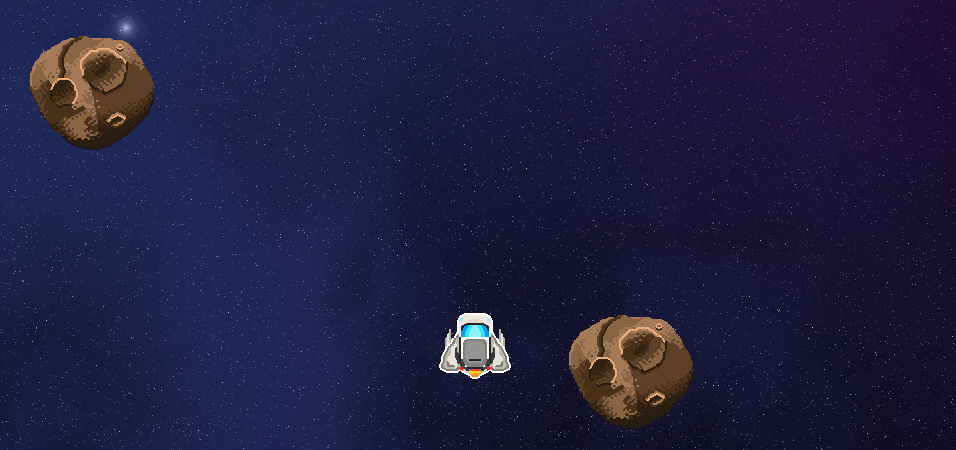

<div class="alert alert-block alert-success">
<b>Lösung Let Spawn Asteroids</b>
</div>

Image Import

In [ ]:
# # # # Import Images # # # # 
ship_surface = pygame.image.load(path+"images/player/SmartSpaceShip.png").convert_alpha()
ship_surface = pygame.transform.scale2x(ship_surface)
ship_rectangle = ship_surface.get_rect(center = (WINDOW_WIDTH / 2, WINDOW_HEIGHT / 2))
laser_surface = pygame.image.load(path+"images/projectiles/single_red1.png").convert_alpha()
laser_surface = pygame.transform.scale2x(laser_surface)
laser_list = []
asteroid_surface = pygame.image.load(path+"images/enemy/Asteroid L lv 1.png").convert_alpha()       # hier das Surface 
asteroid_list = []                                                                                  # und die Liste erstellen

mittels Timer die Liste befüllen

In [ ]:
# im Custom Timer

if event.type == asteroid_timer: 
    asteroid_rectangle = asteroid_surface.get_rect(center = (640, -100))
    asteroid_list.append(asteroid_rectangle)

Methode für das Verhalten der Asteroiden erstellen

In [ ]:
# Methode für das Verhalten der Asteroiden erstellen
def asteroid_behaviour(asteroid_list, speed=300):
    for asteroid in asteroid_list:
        asteroid.y += speed * delta_time
        if asteroid.top > WINDOW_HEIGHT:
            asteroid_list.remove(asteroid)

Asteroiden auf dem Display zeichnen

In [ ]:
# drawings
display.fill((0, 0, 0))
display.blit(background_surface, (0, 0))
display.blit(ship_surface, ship_rectangle)
for laser in laser_list:
    display.blit(laser_surface, laser)

for asteroid in asteroid_list:                                                  # gleiche Schleife wie bei der Laser liste
    display.blit(asteroid_surface, asteroid)                                    # bomben Beispiele für "Wozu brauch man das überhaupt?"

***

## **<span style="color:deepskyblue">Zufällige Startposition für Asteroiden</span>**

Mit dem Random Modul eine zufällige Position am oberen Bildschirmrand definieren.

In [ ]:
from random import randint

In [ ]:
# im Custom Timer
x_position = randint(-100, WINDOW_WIDTH + 100)                                                      # hier eventuell kurz mal einzeichnen
y_position = randint(-100, -50)
if event.type == asteroid_timer: 
    asteroid_rectangle = asteroid_surface.get_rect(center = (x_position, y_position))
    asteroid_list.append(asteroid_rectangle)

# BugReport
# Sollte es hier zuviele Asteroiden auf einmal geben, sind die Events nicht im EventLoop
# Eventuelles komisches Laserverhalten hat die gleiche Ursache

***

## **<span style="color:deepskyblue">Zufällige Richtungen mit Vektoren</span>**

Vektoren sind in der linearen Algebra Elemente, die im Vektorraum anzeigen,\
auf welche Weise ein Punkt per Parallelverschiebung verschoben wird.\
Vektoren sind durch ihre Länge und durch ihre Richtung definiert,\
geben also an, um welchen Abstand und in welcher Richtung\
ein Punkt verschoben wird.

<img src="../../db_assets/kamehouse jindujun.gif" style="width: 500px"/>

Für die Verwendung von Vektoren im zweidimensionalen Raum benötigen wir *Vector2*.\
Ein *Vector2* ist wie eine Art Liste, in der jeder Eintrag aus einem x und einem y Wert besteht.

$
\vec{vector}_2= \left[\begin{array}{c} x \\ y \end{array}\right]
$

Vektoren können mit einem Integer multipliziert werden.\
Dabei werden beide Werte des Vektors verändert.

$
\left[\begin{array}{c} 5 \\ 7 \end{array}\right] * 4 = \left[\begin{array}{c} 20 \\ 28 \end{array}\right]
$

Vektoren können verwendet werden um Rectangles zu bewegen,\
indem die x und y Werte des Tuples verändert werden.

$
rect.center + \left[\begin{array}{c} 5 \\ 7 \end{array}\right]
$

***

<img src="../../db_assets/goku_nimbus_night.jpg" style="height: 350px"/>

***

## **<span style="color:deepskyblue">Common Movement</span>**

$
rect.center += direction * speed * deltatime
$

$
rect.center += \left[\begin{array}{c} 10 \\ 0 \end{array}\right] * 300 * 0.017
$

In [ ]:
def asteroid_behaviour(asteroid_list, speed=300):
    for asteroid in asteroid_list:
        asteroid.y += speed * delta_time                                        # das hier wird jetzt durch den Vector ersetzt
        if asteroid.top >= WINDOW_HEIGHT:
            asteroid_list.remove(asteroid)

def asteroid_behaviour(asteroid_list, speed=300):
    for asteroid in asteroid_list:
        direction = pygame.math.Vector2(1, 2)                                   # den Vektor in der Variable direction speichern
        asteroid.center += direction * speed * delta_time                       # anschließend das Rectangle wie oben beschrieben bewegen
        if asteroid.top >= WINDOW_HEIGHT:
            asteroid_list.remove(asteroid)

### **<span style="color:deepskyblue">Uniform im Asteroid Timer</span>**

In [ ]:
# Asteroid Timer
if event.type == asteroid_timer:
    # Random Position
    x_position = randint(-100, WINDOW_WIDTH + 100)
    y_position = randint(-100, -50)
    
    # create Rectangle
    asteroid_rectangle = asteroid_surface.get_rect(center = (x_position, y_position))
    
    # create random direction
    direction = pygame.math.Vector2(uniform(-0.5, 0.5),1)                                           # y sollte 1 sein, damit alle Asteroiden mit der
                                                                                                    # mit der gleichen Geschwindigkeit fallen
    asteroid_list.append((asteroid_rectangle, direction))                                           # x uniform(-0.5, 0.5) same as randint()
                                                                                                    # in der append funktion jetzt ein tupel übergeben

In [ ]:
def asteroid_behaviour(asteroid_list, speed=300):
    for asteroid_tuple in asteroid_list:
        direction = asteroid_tuple[1]
        asteroid = asteroid_tuple[0]
        asteroid.center += direction * speed * delta_time                       
        if asteroid.top >= WINDOW_HEIGHT:
            asteroid_list.remove(asteroid_tuple)

im Draw bereich noch die *blit()* Methode anpassen

In [ ]:
# drawings
for asteroid_tuple in asteroid_list:
    display.blit(asteroid_surface, asteroid_tuple[0])                           # das daaa

display_score()

# draw final frame
pygame.display.update()